In [22]:
from ipywidgets import interact
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Генерація даних
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Ініціалізація
np.random.seed(42)
initial_centers = X[np.random.choice(X.shape[0], 4, replace=False)]

# Виконання алгоритму та збереження історії
history_centers = [initial_centers.copy()]
history_labels = []

centers = initial_centers.copy()
for _ in range(10):
    distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    history_labels.append(labels.copy())

    new_centers = np.array([X[labels == i].mean(axis=0) for i in range(4)])

    if np.allclose(centers, new_centers):
        break

    centers = new_centers
    history_centers.append(centers.copy())

# Інтерактивна візуалізація
def plot_iteration(iteration=0):
    plt.figure(figsize=(10, 6))

    if iteration < len(history_labels):
        labels = history_labels[iteration]
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
    else:
        plt.scatter(X[:, 0], X[:, 1], color='gray', alpha=0.6, s=50)

    centers = history_centers[iteration]
    plt.scatter(centers[:, 0], centers[:, 1],
               c='red', marker='X', s=300,
               edgecolors='black', linewidths=2,
               label='Centroids')

    plt.title(f'K-Means - Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Інтерактивний слайдер
interact(plot_iteration, iteration=(0, len(history_centers)-1, 1))

interactive(children=(IntSlider(value=0, description='iteration', max=5), Output()), _dom_classes=('widget-int…

<function __main__.plot_iteration(iteration=0)>

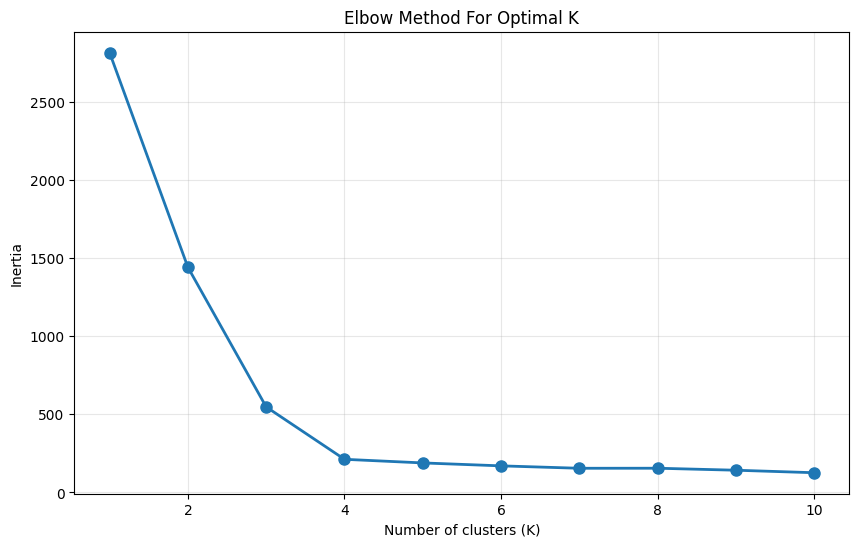

Optimal K by Elbow: 4


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Тестуємо різні K
K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True, alpha=0.3)
plt.show()

# Знаходимо "лікоть" автоматично (приблизно)
from kneed import KneeLocator  # pip install kneed

kl = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(f"Optimal K by Elbow: {optimal_k}")

K=2: Silhouette=0.455
K=3: Silhouette=0.589
K=4: Silhouette=0.682
K=5: Silhouette=0.592
K=6: Silhouette=0.494
K=7: Silhouette=0.422
K=8: Silhouette=0.491
K=9: Silhouette=0.477
K=10: Silhouette=0.394


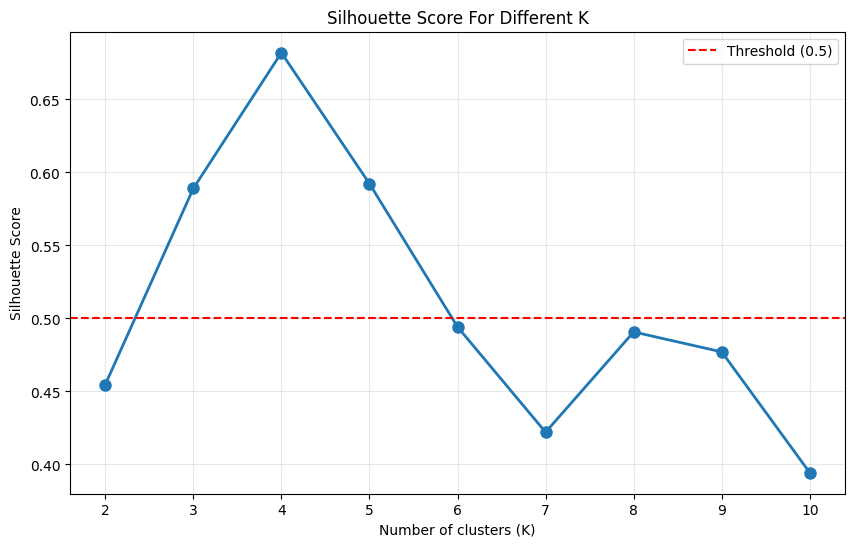

Optimal K by Silhouette: 4


In [25]:
from sklearn.metrics import silhouette_score

K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette={score:.3f}")

# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different K')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.show()

# Оптимальний K
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal K by Silhouette: {optimal_k}")

    K      Inertia  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   2  1190.782359    0.542642        0.561400         405.753290
1   3   546.891150    0.589039        0.626272         615.093327
2   4   212.005996    0.681994        0.437564        1210.089914
3   5   188.773236    0.592388        0.699395        1024.896993
4   6   170.081321    0.494216        0.906318         913.403703
5   7   154.026968    0.392840        1.082555         842.738154
6   8   138.236926    0.321513        1.182640         806.874542
7   9   126.617185    0.330339        1.062627         771.505110
8  10   112.784109    0.341366        1.005238         771.200559


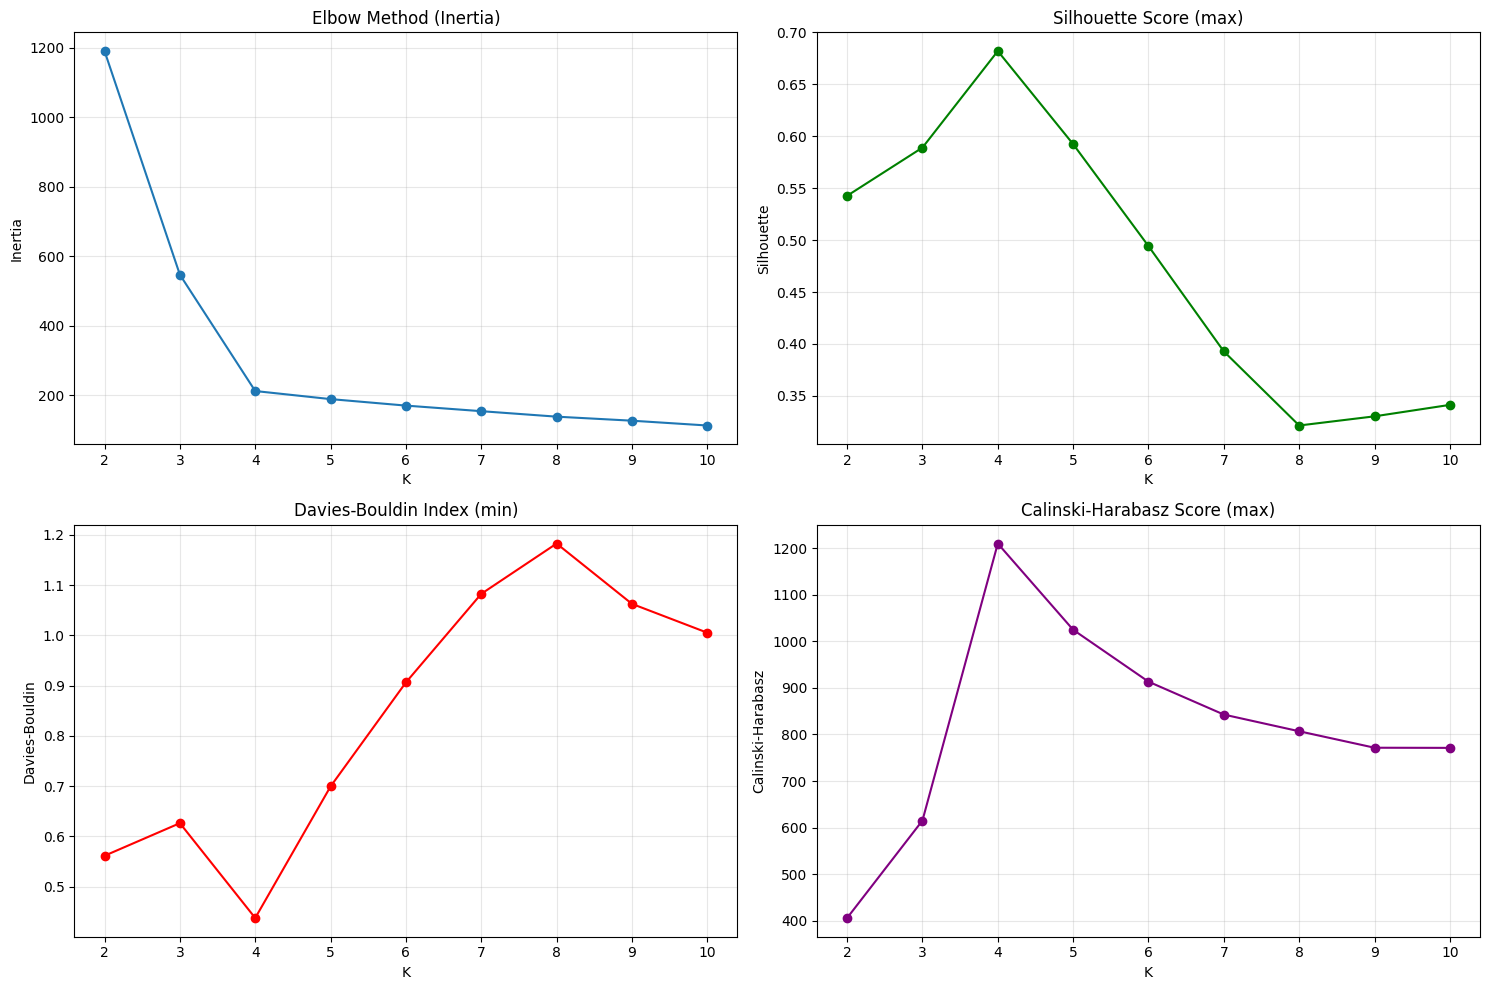

In [27]:
import pandas as pd

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

def evaluate_kmeans(X, k_range):
    results = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        results.append({
            'K': k,
            'Inertia': kmeans.inertia_,
            'Silhouette': silhouette_score(X, labels),
            'Davies-Bouldin': davies_bouldin_score(X, labels),
            'Calinski-Harabasz': calinski_harabasz_score(X, labels)
        })

    return pd.DataFrame(results)

# Оцінка
results_df = evaluate_kmeans(X, range(2, 11))
print(results_df)

# Візуалізація всіх метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Inertia (Elbow)
axes[0, 0].plot(results_df['K'], results_df['Inertia'], 'o-')
axes[0, 0].set_title('Elbow Method (Inertia)')
axes[0, 0].set_xlabel('K')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette (максимум)
axes[0, 1].plot(results_df['K'], results_df['Silhouette'], 'o-', color='green')
axes[0, 1].set_title('Silhouette Score (max)')
axes[0, 1].set_xlabel('K')
axes[0, 1].set_ylabel('Silhouette')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin (мінімум)
axes[1, 0].plot(results_df['K'], results_df['Davies-Bouldin'], 'o-', color='red')
axes[1, 0].set_title('Davies-Bouldin Index (min)')
axes[1, 0].set_xlabel('K')
axes[1, 0].set_ylabel('Davies-Bouldin')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz (максимум)
axes[1, 1].plot(results_df['K'], results_df['Calinski-Harabasz'], 'o-', color='purple')
axes[1, 1].set_title('Calinski-Harabasz Score (max)')
axes[1, 1].set_xlabel('K')
axes[1, 1].set_ylabel('Calinski-Harabasz')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

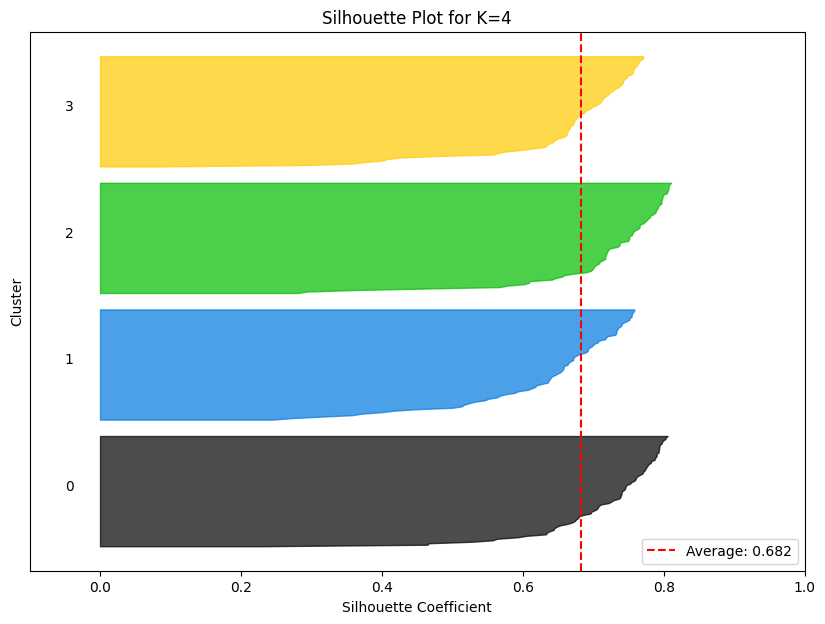

In [28]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_silhouette(X, n_clusters):
    """Візуалізація Silhouette Plot для кластеризації"""

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Візуалізація
    fig, ax = plt.subplots(figsize=(10, 7))

    y_lower = 10
    for i in range(n_clusters):
        # Silhouette scores для кластера i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # Label кластера
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax.set_title(f'Silhouette Plot for K={n_clusters}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')

    # Середня лінія
    ax.axvline(x=silhouette_avg, color="red", linestyle="--",
               label=f'Average: {silhouette_avg:.3f}')

    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.legend()
    plt.show()

# Приклад використання
plot_silhouette(X, n_clusters=4)

In [29]:
from sklearn.preprocessing import StandardScaler

# K-Means чутливий до масштабу ознак!
# Завжди масштабуй дані перед кластеризацією

# Без масштабування
kmeans_no_scale = KMeans(n_clusters=3, random_state=42)
labels_no_scale = kmeans_no_scale.fit_predict(X)

# З масштабуванням
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Порівняння
from sklearn.metrics import silhouette_score

print(f"Silhouette без масштабування: {silhouette_score(X, labels_no_scale):.3f}")
print(f"Silhouette з масштабуванням: {silhouette_score(X_scaled, labels_scaled):.3f}")

Silhouette без масштабування: 0.589
Silhouette з масштабуванням: 0.466


In [30]:
from sklearn.cluster import MiniBatchKMeans
import time

# Генерація великого датасету
X_large, _ = make_blobs(n_samples=100000, centers=5, random_state=42)

# KMeans (стандартний)
start = time.time()
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_large)
time_kmeans = time.time() - start

# MiniBatchKMeans
start = time.time()
mbkmeans = MiniBatchKMeans(
    n_clusters=5,
    batch_size=1000,      # Розмір батчу
    max_iter=100,
    random_state=42
)
mbkmeans.fit(X_large)
time_mbkmeans = time.time() - start

print(f"KMeans:         {time_kmeans:.2f} сек")
print(f"MiniBatchKMeans: {time_mbkmeans:.2f} сек")
print(f"Прискорення:    {time_kmeans/time_mbkmeans:.1f}x")

# Порівняння якості
from sklearn.metrics import silhouette_score

labels_km = kmeans.predict(X_large)
labels_mbkm = mbkmeans.predict(X_large)

print(f"\nSilhouette KMeans:     {silhouette_score(X_large, labels_km):.3f}")
print(f"Silhouette MiniBatch:  {silhouette_score(X_large, labels_mbkm):.3f}")

KMeans:         0.03 сек
MiniBatchKMeans: 0.01 сек
Прискорення:    3.0x

Silhouette KMeans:     0.668
Silhouette MiniBatch:  0.668
